# Exercise 8: Bagging

### GRA 4160

## Bootstrap Aggregation (Bagging)

- Bagging stands for Bootstrap Aggregation
- It is an ensemble technique that combines multiple models trained on different subsets of the training data
- Bagging reduces overfitting by aggregating the results of many base models trained on different subsets of the training data, leading to a more generalized model.
- In bagging, each model is trained independently, and the final prediction is the average (in regression) or majority vote (in classification) of the predictions of the individual models.
- One of the most popular bagging algorithms is the Random Forest algorithm (will be covered in the next lecture), which builds a collection of decision trees using random subsets of the features and training samples.

## Bootstrap

Bootstrap works by creating multiple samples from the original data by randomly sampling with replacement.
In each bootstrap sample, some data points are selected multiple times, while others are not selected at all.
This results in a new dataset that has the same size as the original dataset but with some variability in the data points.

By creating multiple bootstrap samples and training the model on each sample, we can estimate the variability of the model's performance and parameter estimates, and compute confidence intervals for the model's predictions.
This is particularly useful when the sample size is small, or when the distribution of the data is unknown or complex.

## Classifying Breast Cancer with Bagging

Here we will classify breast cancer based on a dataset of patient information.
The dataset contains information on patient features such as their age, tumor size, and number of positive lymph nodes, as well as whether the patient's cancer has recurred.
We train a classifier to predict whether a new patient's cancer is likely to recur.

In [1]:
# Load and prepare the dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.4, random_state=42)

In [2]:
#  Train the Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create an instance of the BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

# Train the BaggingClassifier on the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [3]:
# Evaluate the Classifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the testing set
y_pred = bag_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the confusion matrix of the classifier
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Evaluate the classification report of the classifier
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.9517543859649122
Confusion matrix:
 [[ 74   6]
 [  5 143]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.96      0.97      0.96       148

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



In [4]:
# Tune the Hyperparameters

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create an instance of the BaggingClassifier with different hyperparameters
bag_clf1 = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, max_samples=10, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf2 = BaggingClassifier(base_estimator=tree_clf, n_estimators=200, max_samples=50, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf3 = BaggingClassifier(base_estimator=tree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf4 = BaggingClassifier(base_estimator=tree_clf, n_estimators=1000, max_samples=200, bootstrap=True, n_jobs=-1, random_state=42)

# Train each BaggingClassifier on the training set
bag_clf1.fit(X_train, y_train)
bag_clf2.fit(X_train, y_train)
bag_clf3.fit(X_train, y_train)
bag_clf4.fit(X_train, y_train)

# Evaluate the performance of each BaggingClassifier on the testing set
print("Bagging Classifier 1:")
print("Accuracy:", bag_clf1.score(X_test, y_test))
print("Bagging Classifier 2:")
print("Accuracy:", bag_clf2.score(X_test, y_test))
print("Bagging Classifier 3:")
print("Accuracy:", bag_clf3.score(X_test, y_test))
print("Bagging Classifier 4:")
print("Accuracy:", bag_clf4.score(X_test, y_test))


Bagging Classifier 1:
Accuracy: 0.9605263157894737
Bagging Classifier 2:
Accuracy: 0.9429824561403509
Bagging Classifier 3:
Accuracy: 0.9517543859649122
Bagging Classifier 4:
Accuracy: 0.9517543859649122


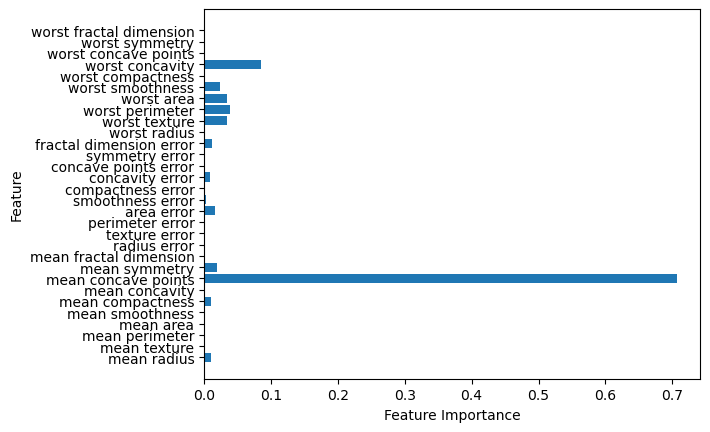

In [5]:
# Visualize the Feature importances

import matplotlib.pyplot as plt

tree_clf.fit(X_train, y_train)

# Plot the feature importances
feature_importances = tree_clf.feature_importances_
plt.barh(range(data.data.shape[1]), feature_importances)
plt.yticks(range(data.data.shape[1]), data.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()